# Biomarkers On Brains

## By Cooper Mellema

### This program plots discovered biomarkers on MNIST standard brains

In [5]:
import BiomarkersOnBrains as bob
%matplotlib inline
import os
import nilearn
import numpy as np
import pandas as pd
import pickle as pkl
import math
import re
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.input_data import NiftiSpheresMasker

In [2]:
# Fetch the atlas that will be used in this case
dBASC = datasets.fetch_atlas_basc_multiscale_2015(version='sym')

In [3]:
# Set atlases per model
dModelAtlases={
     2:'scale122',
     5:'scale122'
}

In [138]:
sAtlas=dBASC['scale064']
# for iModel, sAtlasKey in dModelAtlases.items():
#     # Process the model and make the glass brain
#     iPermutations=1
#     sDir = f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AlternateMetrics/AtlasResolutionComparison{iPermutations}Permutations'
#     bob.fProcessModel(iModel, sAtlas, iPermutations, sDir=sDir, flThresh=0, iTop=6)

In [220]:
#iDeep=2 # for 122 rois
iDeep=1 # for 064 ROIs
#iLin=5 # for 122 ROIs
iLin=4 #for 064 ROIs

In [221]:
sDir = f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AlternateMetrics/AtlasResolutionComparison{iPermutations}Permutations'
dDeepImportances = pkl.load(open(os.path.join(sDir, f'Model{iDeep}Importances.p'), 'rb'))
pdDeepImportances = bob.fFormatImportances(dDeepImportances)
dLinImportances = pkl.load(open(os.path.join(sDir, f'Model{iLin}Importances.p'), 'rb'))
pdLinImportances = bob.fFormatImportances(dLinImportances)

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAuttfGPUv4/lib/python3.6/site-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AlternateMetrics/AtlasResolutionComparison1Permutations/Model1Importances.p'>
  
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAuttfGPUv4/lib/python3.6/site-packages/ipykernel_launcher.py:4: ResourceWarning: unclosed file <_io.BufferedReader name='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AlternateMetrics/AtlasResolutionComparison1Permutations/Model4Importances.p'>
  after removing the cwd from sys.path.


In [222]:
pdDeepImportances=pdDeepImportances.sort_values(by=['Importance'], axis=0, ascending=False)
pdLinImportances=pdLinImportances.sort_values(by=['Importance'], axis=0, ascending=False)

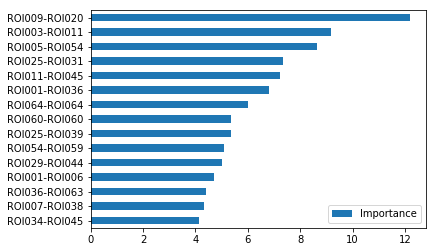

In [223]:
pdDeepImportances.head(15).sort_values(by=['Importance'], axis=0).plot(kind='barh')

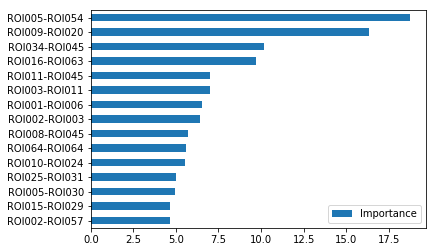

In [224]:
pdLinImportances.head(15).sort_values(by=['Importance'], axis=0).plot(kind='barh')

In [225]:
pdTopDeep=pdDeepImportances.head(15)
pdTopLin=pdLinImportances.head(15)

In [234]:
# Use this to populate a list of deep and a list of linear ROIs
lssROIs=[]
#for sIndex in pdTopLin.index:
for sIndex in pdTopDeep.index:
    lsTwo=re.findall('\d+', sIndex)
    lssROIs.append(lsTwo)
lssROIs=np.unique(lssROIs)
lsROIs=[]
for sROI in lssROIs:
    lsROIs.append(int(sROI))

In [235]:
#lsLinROIs=lsROIs
lsDeepROIs=lsROIs

In [236]:
lsLinROIs

[1,
 2,
 3,
 5,
 6,
 8,
 9,
 10,
 11,
 15,
 16,
 20,
 24,
 25,
 29,
 30,
 31,
 34,
 45,
 54,
 57,
 63,
 64]

In [237]:
lsDeepROIs

[1,
 3,
 5,
 6,
 7,
 9,
 11,
 20,
 25,
 29,
 31,
 34,
 36,
 38,
 39,
 44,
 45,
 54,
 59,
 60,
 63,
 64]

In [238]:
lsAllROIs=lsLinROIs+lsDeepROIs

In [239]:
lsAllROIs=np.unique(lsAllROIs)
lsAllROIs

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 15, 16, 20, 24, 25, 29, 30,
       31, 34, 36, 38, 39, 44, 45, 54, 57, 59, 60, 63, 64])

In [150]:
aCentroids=bob.fFindCentroids(sAtlas)

In [151]:
lsLoc=lsAllROIs
lsLoc[:]=[x-1 for x in lsAllROIs]
aLocations=aCentroids[lsLoc]

In [175]:
dROILoc={}
for iROI in lsAllROIs:
    dROILoc.update({iROI: aCentroids[iROI-1]})

In [176]:
dROILoc

{1: array([-24.94559099,   1.21763602,   1.27579737]),
 2: array([-43.35348837,  -8.99534884,  -2.32093023]),
 3: array([ -8.625  , -45.04375,  -8.6375 ]),
 5: array([-25.77372263, -54.44160584, -51.16058394]),
 6: array([-15.13407821, -45.74022346, -23.63687151]),
 7: array([-6.79787234, 21.32446809, 28.28723404]),
 8: array([ -9.86029412,  11.77205882, -11.46323529]),
 9: array([-39.81991525,   4.38347458, -40.20550847]),
 10: array([-7.79617834, 31.08280255, 39.78980892]),
 11: array([ 32.67451382, -68.4616172 , -38.41146366]),
 15: array([-24.19726027, -70.24657534, -53.92054795]),
 16: array([-28.64705882, -47.37647059, -10.82352941]),
 20: array([-49.69889503, -56.97651934,  37.77486188]),
 24: array([-57.56485356,  -6.44769874, -20.5334728 ]),
 25: array([-25.85875706, -19.38418079, -13.96045198]),
 29: array([-21.05555556, -59.35      , -27.65      ]),
 30: array([-29.69784173, -93.77338129,   0.51438849]),
 31: array([ 50.4375    , -57.37804878,  37.21036585]),
 34: array([-8.

In [210]:
#look up coordinates on http://sprout022.sprout.yale.edu/mni2tal/mni2tal.html, record brodman areas
dROICorrespondence064={
    1:'L. Putamen (BA 49)',
    2:'L. Insula (BA 13)',
    3:'L. Anterior Lobe of Cerebellum',
    5:'L. Posterior Lobe of Cerebellum',
    6:'L. Anterior Lobe of Cerebellum',
    7:'L. Dorsal Cingulate (BA 32)',
    8:'L. Nucleus Accumbens (BA 52)',
    9:'L. Language Association Cortex (BA 38)',
    10:'L. Frontal Cortex (BA 8)',
    11:'L. Posterior Lobe of Cerebellum',
    15:'L. Posterior Lobe of Cerebellum',
    16:'L. Fusiform (BA 37)',
    20:'L. Language Association Cortex (BA 39)',
    24:'L. Auditory Association Cortex (BA 21)',
    25:'L. Hippocampus (54)',
    29:'L. Anterior Lobe of Cerebellum',
    30:'L. Visual Association (BA 18)',
    31:'R. Language Association Cortex (BA 39)',
    34:'L. Dorsal Cingulate (BA 32)',
    36:'L. Language Association Cortex (BA 38)',
    38:'L. Visual Association (BA 18)',
    39:'R. Frontal Cortex (BA 8)',
    44:'L. Posterior Lobe of Cerebellum',
    45:'L. Supplementary Motor (BA 6)',
    54:'R. Frontal Cortex (BA 44)',
    57:'L. Posterior Lobe of Cerebellum',
    59:'L. Visual Association (BA 18)',
    60:'L. Supplementary Motor (BA 6)',
    63:'L. Frontal Cortex (BA 8)',
    64:'L. Auditory Association Cortex (BA 21)',
}

In [104]:
#look up coordinates on http://sprout022.sprout.yale.edu/mni2tal/mni2tal.html, record brodman areas
dROICorrespondence122={
    1: 'L. Prim. Motor (BA 4)',
    2: 'L. Caudate (BA 48)',
    4: 'L. Language Association Cortex (BA 39)',
    5: 'L. Supplementary Motor (BA 6)',
    6: 'L. Dorsal Cingulate (BA 32)',
    10: 'L. Caudate (BA 48)',
    12: 'L. Insula (BA 13)',
    15: 'R. Language Association Cortex (BA 39)',
    18: 'L Cerebellum - Posterior Lobe',
    25: 'L. Putamen (BA 49)',
    26: 'L. Supplementary Motor (BA 6)',
    31: 'L. Thalamus (BA 50)',
    32: 'R. Auditory Association Cortex (BA 21)',
    36: 'L. Thalamus (BA 50)',
    39: 'L. Secondary Visual Cortex (BA 19)',
    41: 'L. Visual Association (BA 18)',
    42: 'L. Hippocampus (BA 54)',
    44: 'L. Cerebellum - Anterior Lobe',
    45: 'L. Caudate (BA 48)',
    48: 'L. Cerebellum - Anterior Lobe',
    50: 'L. Language Association Cortex (BA 39)',
    56: 'L. Secondary Visual Cortex (BA 19)',
    71: 'L. Hippocampus (BA 54)',
    72: 'L Retrosplenial Cortex (BA 30)',
    73: 'R. Supplementary Motor (BA 6)',
    75: 'L. Prefrontal Cortex (BA 10)',
    87: 'L. Prefrontal Cortex (BA 10)',
    88: 'L. Auditory Association Cortex (BA 22)',
    98: 'R. Language Association Cortex (BA 39)',
    101: 'L. Secondary Visual Cortex (BA 19)',
    109: 'L. Language Association Cortex (BA 47)',
    110: 'L. Supplementary Motor (BA 6)',
    120: "L. Broca's Area (BA 45)",
    122: 'L. Supplementary Motor (BA 6)'
}

In [251]:
dROICorrespondence=dROICorrespondence064
#dROICorrespondence=dROICorrespondence122
for sIndex in pdTopLin.index:
    #lsTwo=re.findall('\d+', sIndex)
    #pdTopLin=pdTopLin.rename(index={sIndex: f'{dROICorrespondence[int(lsTwo[0])]} to {dROICorrespondence[int(lsTwo[1])]}'})
    pdTopLin=pdTopLin.rename(index={sIndex: sIndex.replace('-', ' to ')})

In [252]:
for sIndex in pdTopDeep.index:
#     lsTwo=re.findall('\d+', sIndex)
#     pdTopDeep=pdTopDeep.rename(index={sIndex: f'{dROICorrespondence[int(lsTwo[0])]} to {dROICorrespondence[int(lsTwo[1])]}'})
    pdTopDeep=pdTopDeep.rename(index={sIndex: sIndex.replace('-', ' to ')})

Text(0.5, 0, 'Importance: Number of Standard Deviations from mean Importance')

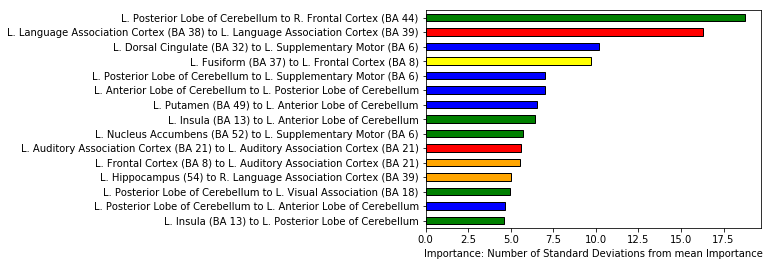

In [253]:
lsColors=[[
    'g',
    'b',
    'g',
    'orange',
    'orange',
    'r',
    'g',
    'g',
    'b',
    'b',
    'b',
    'yellow',
    'b',
    'r',
    'g'
]]
pdTopLin.sort_values(by=['Importance'], axis=0).plot(kind='barh', legend=None, edgecolor='k', stacked=True, color=lsColors)
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')

Text(0.5, 0, 'Importance: Number of Standard Deviations from mean Importance')

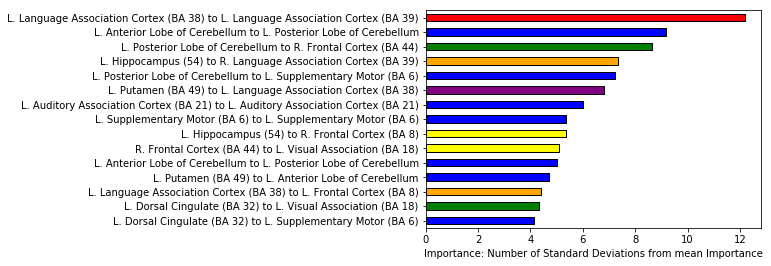

In [254]:
lsColors=[[
    'b',
    'g',
    'orange',
    'b',
    'b',
    'yellow',
    'yellow',
    'b',
    'b',
    'purple',
    'b',
    'orange',
    'g',
    'b',
    'r'
]]
pdTopDeep.sort_values(by=['Importance'], axis=0).plot(kind='barh', legend=None, edgecolor='k', stacked=True, color=lsColors)
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')

In [248]:
lsDeep=list(pdTopDeep.index)
lsLin=list(pdTopLin.index)

In [249]:
list(set(lsDeep).intersection(lsLin))

['L. Language Association Cortex (BA 38)-L. Language Association Cortex (BA 39)',
 'L. Anterior Lobe of Cerebellum-L. Posterior Lobe of Cerebellum',
 'L. Posterior Lobe of Cerebellum-R. Frontal Cortex (BA 44)',
 'L. Putamen (BA 49)-L. Anterior Lobe of Cerebellum',
 'L. Auditory Association Cortex (BA 21)-L. Auditory Association Cortex (BA 21)',
 'L. Dorsal Cingulate (BA 32)-L. Supplementary Motor (BA 6)',
 'L. Hippocampus (54)-R. Language Association Cortex (BA 39)',
 'L. Posterior Lobe of Cerebellum-L. Supplementary Motor (BA 6)']

*******************************************
NOW, we do the same thing for the structural data

In [177]:
iModelLin=14
iModelDeep=13

In [178]:
sAtlas='anat'

In [180]:
# Load importances
dDeepImportances = pkl.load(open(os.path.join(sDir, f'Model{iModelDeep}Importances.p'), 'rb'))
pdDeepImportances = bob.fFormatImportances(dDeepImportances)

# Load importances
dLinImportances = pkl.load(open(os.path.join(sDir, f'Model{iModelLin}Importances.p'), 'rb'))
pdLinImportances = bob.fFormatImportances(dLinImportances)

/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAuttfGPUv4/lib/python3.6/site-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AlternateMetrics/AtlasResolutionComparison1Permutations/Model13Importances.p'>
  
/project/bioinformatics/DLLab/shared/CondaEnvironments/CooperAuttfGPUv4/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.BufferedReader name='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AlternateMetrics/AtlasResolutionComparison1Permutations/Model14Importances.p'>
  


In [198]:
pdTopDeep=pdDeepImportances.sort_values(by=['Importance'], axis=0, ascending=False).head(15)
pdTopLin=pdLinImportances.sort_values(by=['Importance'], axis=0, ascending=False).head(15)

pdTopStructDeep=pdDeepImportances.loc[[x for x in pdDeepImportances.index if not (x.__contains__('Site') or x.__contains__('Sex'))]]
pdTopStructDeep=pdTopStructDeep.sort_values(by=['Importance'], axis=0, ascending=False).head(15)

pdTopStructLin=pdLinImportances.loc[[x for x in pdLinImportances.index if not (x.__contains__('Site') or x.__contains__('Sex'))]]
pdTopStructLin=pdTopStructLin.sort_values(by=['Importance'], axis=0, ascending=False).head(15)


Text(0.5, 0, 'Importance: Number of Standard Deviations from mean Importance')

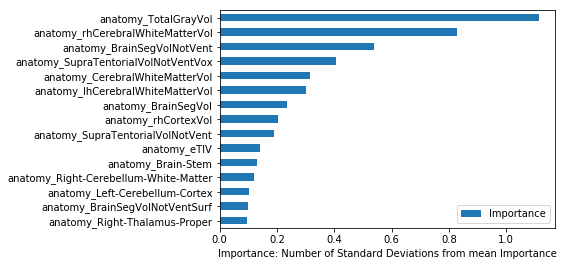

In [255]:
pdTopStructDeep.iloc[::-1].plot(kind='barh')
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')

In [256]:
lsNewIndex=[
   'Total Gray Matter Volume',
   'Right Cerebral White Matter Volume',
   'Brain Segmentation Volume-No Ventricles', 
   'Suprarentorial Volume-No Ventricles',
   'Cerebral White Matter Volume',
   'Left Cerebral White Matter Volume',
   'Brain Segmentation Volume', 
   'Right Cortex Volume',
   'Supratentorial Volume',
   'Total Intracranial Volume',
   'Brainstem Volume',
   'Right Cerebellum White Matter Volume',
   'Left Cerebellum Cortical Volume',
   'Brain Segmentation Volume-No Ventricles',
   'Right Thalamus Volume']

In [257]:
pdTopStructDeep.index=lsNewIndex

Text(0.5, 0, 'Importance: Number of Standard Deviations from mean Importance')

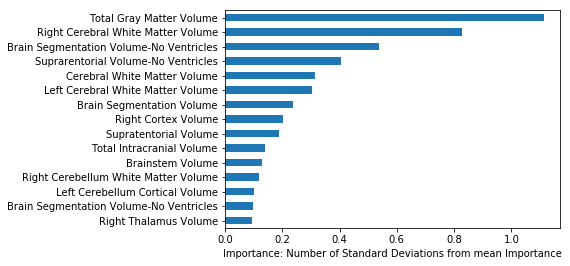

In [258]:
pdTopStructDeep.iloc[::-1].plot(kind='barh', legend=None)
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')

Text(0.5, 0, 'Importance: σ from Mean Importance')

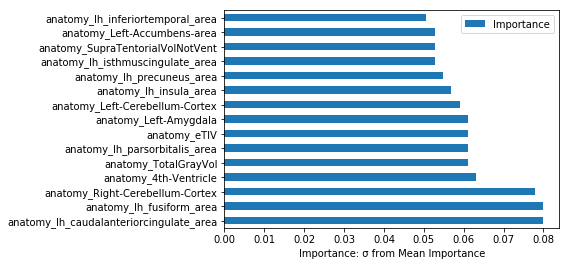

In [199]:
pdTopStructLin.plot(kind='barh')
plt.xlabel('Importance: \u03C3 from Mean Importance')

In [259]:
pdTopStructLin.index

Index(['Left Caudal Anterior Cingulate Area', 'Left Fusiform Area',
       'Right Cerebellum Cortex Volume', '4th-Ventricle Volume',
       'Total Gray Matter Volume', 'Left Parsorbitalis Area',
       'Total Intracranial Volume', 'Left Amygdala Volume',
       'Left Cerebellum Cortex Volume', 'Left Insula Area',
       'Left Precuneus Area', 'Left Isthmus-cingulate Area',
       'Supratentorial Volume-No Ventricles', 'Left Accumbens Area',
       'Left Inferior Temporal Area'],
      dtype='object')

In [201]:
lsNewLinIndex=[
   'Left Caudal Anterior Cingulate Area',
   'Left Fusiform Area',
   'Right Cerebellum Cortex Volume', 
   '4th-Ventricle Volume',
   'Total Gray Matter Volume',
   'Left Parsorbitalis Area',
   'Total Intracranial Volume',
   'Left Amygdala Volume',
   'Left Cerebellum Cortex Volume',
   'Left Insula Area',
   'Left Precuneus Area',
   'Left Isthmus-cingulate Area',
   'Supratentorial Volume-No Ventricles',
   'Left Accumbens Area',
   'Left Inferior Temporal Area'
]

In [202]:
pdTopStructLin.index=lsNewLinIndex

Text(0.5, 0, 'Importance: Number of Standard Deviations from mean Importance')

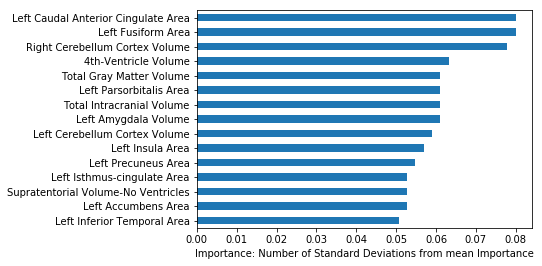

In [260]:
pdTopStructLin.iloc[::-1].plot(kind='barh', legend=None)
plt.xlabel('Importance: Number of Standard Deviations from mean Importance')

Text(0.5, 0, '$log_{10}(\\alpha)$')

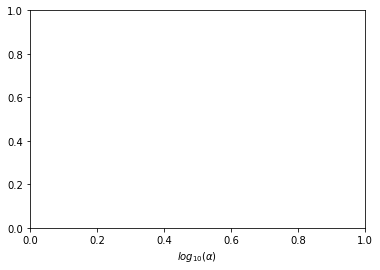

In [209]:
plt.xlabel(r'$log_{10}(\alpha)$')